<a href="https://colab.research.google.com/github/madhuriH2/week4/blob/main/theartofvisualstorytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install huggingface_hub


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Detected objects: ['vase', 'potted plant', 'laptop', 'dining table', 'cell phone']


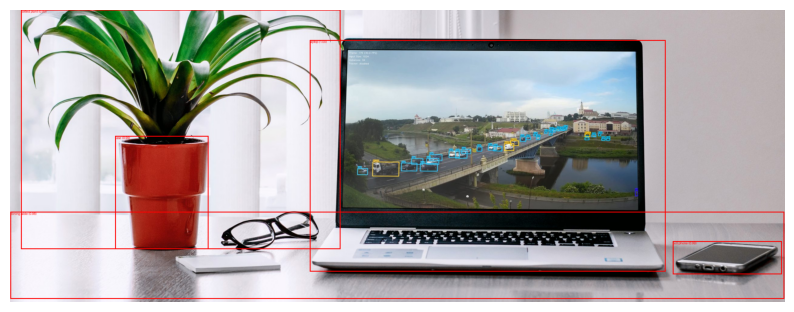

In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image, ImageDraw
import requests
import matplotlib.pyplot as plt

processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

image = Image.open("/content/image22.jpeg")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

confidence_threshold = 0.9
objects = []

draw = ImageDraw.Draw(image)
for logit, box in zip(outputs.logits[0], outputs.pred_boxes[0]):
    probs = logit.softmax(-1)
    top_class = probs.argmax()
    score = probs[top_class].item()

    if score > confidence_threshold:
        label = model.config.id2label.get(top_class.item(), None)


        if label:
            width, height = image.size
            box = box.cpu().detach().numpy()
            objects.append(label)

            x_center, y_center, box_width, box_height = box
            x0 = (x_center - box_width / 2) * width
            y0 = (y_center - box_height / 2) * height
            x1 = (x_center + box_width / 2) * width
            y1 = (y_center + box_height / 2) * height

            draw.rectangle([x0, y0, x1, y1], outline="red", width=3)
            draw.text((x0, y0), f"{label} ({score:.2f})", fill="red")

print("Detected objects:", objects)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()
